
# Project: Investigate a Dataset to explore Insights from TMDb movie

<a id='intro'></a>
## Introduction

In this project we will deep dive into the TMDb movie dataset, which has a listing of more than 10,000 movies. Deep dive into the data to gather key findings and 

Questions to address based on the data studied:
* Which genre were popular over the period of years
* Which were the top movies that made maximum profits


In [75]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [76]:
df = pd.read_csv("tmdb-movies.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Profiling

In [77]:
# unique directors -- 5068
# len(df_v1['director'].unique())

# unique directors -- 10720
# len(df_v1['cast'].unique())

# unique directors -- 7446
# len(df['production_companies'].unique())


df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning - Remove Duplicates

In [78]:
# Check for duplicate entry, remove the same 

# Check for missing values
df.isnull().sum(axis=0)

# Select required attributes for analysis
col=['original_title','popularity','production_companies','budget','revenue','cast','director','genres','release_date','vote_count','vote_average','release_year','budget_adj','revenue_adj']
df=df[col]

# analyse the list of generes, create unique list
a=df["genres"].str.split("|",expand=True)
a.rename(columns=lambda x: "genres_"+str(x), inplace=True)

b=df["production_companies"].str.split("|",expand=True)
b.rename(columns=lambda x: "production_comp_"+str(x), inplace=True)



#df=pd.concat([df,a],axis=0)
df=df.join(a,how='outer')
df=df.join(b,how='outer')

# Extract Movie Release Month
df['release_mth']=pd.to_datetime(df['release_date']).dt.strftime('%b')


df.dropna(subset=['genres_0'],inplace=True)

# Update value with mean where there is no info on revenue and budget
df['budget'][df.eval('budget==0')]=df.query('budget!=0')['budget'].mean() 
df['revenue'][df.eval('revenue==0')]=df.query('revenue!=0')['revenue'].mean() 

df=df.drop_duplicates(keep='first')

# confirm if duplicates are removed
df[df.duplicated(keep=False)]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,original_title,popularity,production_companies,budget,revenue,cast,director,genres,release_date,vote_count,...,genres_1,genres_2,genres_3,genres_4,production_comp_0,production_comp_1,production_comp_2,production_comp_3,production_comp_4,release_mth


<a id='eda'></a>
## Exploratory Data Analysis


#### Research Question 1- Popular Genres across year

 Data Study:

In [79]:
# Analyse the Correlation between variables
df.corr()

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.440002,0.570405,0.800786,0.210432,0.090200,0.513311,0.608964
budget,0.440002,1.000000,0.640935,0.547900,0.059783,0.136435,0.809260,0.525715
revenue,0.570405,0.640935,1.000000,0.715252,0.118269,0.073292,0.574793,0.831318
vote_count,0.800786,0.547900,0.715252,1.000000,0.254698,0.108275,0.586923,0.707865
vote_average,0.210432,0.059783,0.118269,0.254698,1.000000,-0.119851,0.093811,0.193836
release_year,0.090200,0.136435,0.073292,0.108275,-0.119851,1.000000,0.017076,-0.066118
budget_adj,0.513311,0.809260,0.574793,0.586923,0.093811,0.017076,1.000000,0.646507
revenue_adj,0.608964,0.525715,0.831318,0.707865,0.193836,-0.066118,0.646507,1.000000


Scatter plot and Histogram to describe the discribtion and correleation 

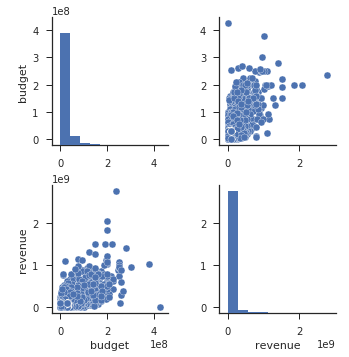

In [80]:
g = sns.pairplot(df[['release_date','budget','revenue','genres_0']],palette=sns.color_palette("hls", 8))

Data distribution across years -

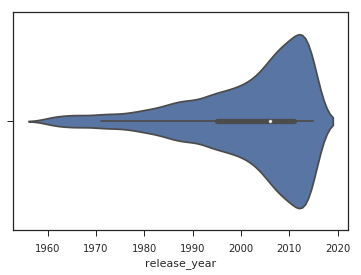

In [81]:
ax = sns.violinplot(x=df['release_year'])

In [82]:
#ax = sns.heatmap(df_sum, linewidths=.5)


The Above Plot depicts the histogram and data scattering of Budget and revenue. It is noticed that there is a strong 
correlation between the two variables, hence can be used generate meaningfull insights.


#### Data Preparation to Address the Investigation queries:

In [83]:
##### Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#df.hist(column=['revenue','budget','vote_count','vote_average'],grid=True,figsize=(5,3))

#df.boxplot(column=['revenue','budget','vote_count','vote_average'])
#df.info()

#df.plot.scatter(x='budget',y='popularity')

         
# Append Multiple Genres into rows
df1=df[['release_mth','release_year','genres_0','popularity']]
df2=df[['release_mth','release_year','genres_1','popularity']]
df3=df[['release_mth','release_year','genres_2','popularity']]
df4=df[['release_mth','release_year','genres_3','popularity']]
df5=df[['release_mth','release_year','genres_4','popularity']]
df2.rename(columns={'genres_1':'genres_0'},inplace=True)
df3.rename(columns={'genres_2':'genres_0'},inplace=True)
df4.rename(columns={'genres_3':'genres_0'},inplace=True)
df5.rename(columns={'genres_4':'genres_0'},inplace=True)
df_Coll=pd.concat([df1,df2,df3,df4,df5])
df_Coll.drop_duplicates()
df_Coll['release_mth_yr']=df_Coll['release_year'].astype(str) +'-'+df_Coll['release_mth']
df_Coll=pd.crosstab(df_Coll['release_year'], df_Coll['genres_0']).reset_index()



/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


### Plot genres that were released over the period of years

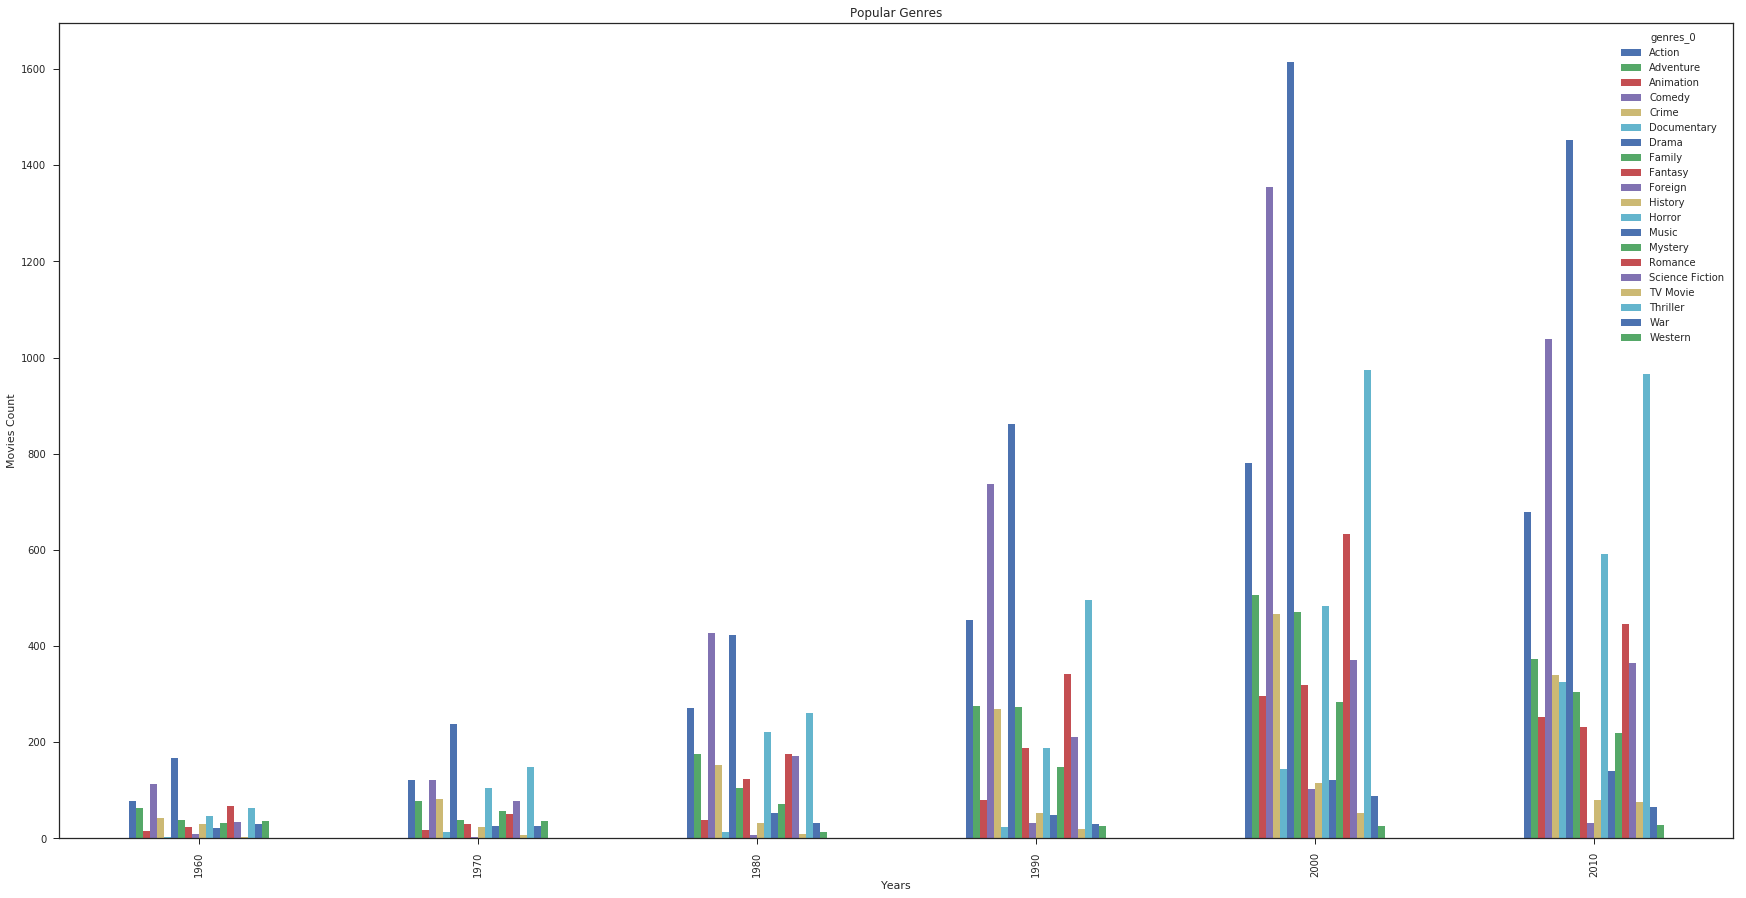

In [84]:

col=df_Coll.columns.values.tolist()
del col[0]

df_sum=df_Coll.groupby([((df_Coll.release_year//10)*10)])[col].sum().reset_index()

df_sum.plot.bar(x='release_year',y=col,figsize=(30,15),legend=True,xticks = np.arange(1960,2016,10),title="Popular Genres",)
plt.xlabel('Years')
plt.ylabel('Movies Count')
plt.rcParams['font.size'] = 15

### Research Question 2  - Top 10 movies that made maximum profit

Text(0,0.5,'Profit in $')

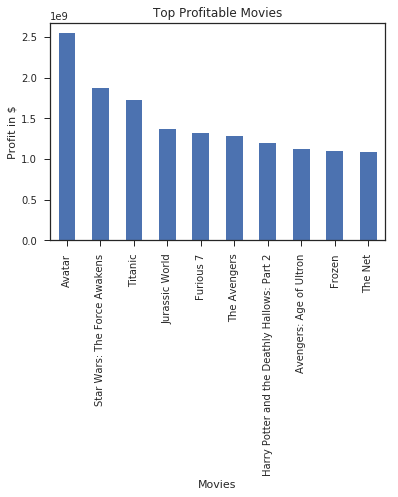

In [85]:
df_02=df
df_02.corr()
# There is a strong correleation between budget and revenue

df_02['profit']=(df_02['revenue']-df_02['budget']).astype(int)
df_02_sum=df_02.groupby('original_title')[['profit']].sum().reset_index()
df_02_sum.sort_values('profit',ascending=False,inplace=True)


df_02_sum.head(10).plot.bar(x='original_title',y='profit',title='Top Profitable Movies',legend=False)
plt.xlabel('Movies')
plt.ylabel('Profit in $')


<a id='conclusions'></a>
## Conclusions

* The popular genres over the period of time were Drama followed by  comedy and Thriller
* Movies that generated the maximum profiles are Avatar, Star Wars, Titanic, Jurassic World, Furious 7, The Avengers, Harry Potter part 2, Avengers Ultron and the Net.

Limitations-
Based on the Data Analysis, it is noticed that most of the movies do not have data assinged for budgets and revenue,   however, dropping such data from the analysis could provide necessary insights based on the available data 

In [86]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0